In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing  and reading dataset

ds=pd.read_csv("Social_Network_Ads.csv")

In [3]:
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
# Searching for duplicates

ds.duplicated().sum()

np.int64(0)

In [5]:
# Rermiving duplicates

ds.drop_duplicates(inplace=True)

In [7]:
# Checking for missing values

ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# Slpit data as Dependent and Independent variable 
x=ds[['Age','EstimatedSalary']]
y=ds[['Purchased']]


In [9]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [12]:
# Model selection and Model fitting with train test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
# Applying decision tree algorithm

from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier(criterion='entropy',random_state=0)
cls.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
# Predict for myinput

result=cls.predict(sc.transform([[30,150000]]))
result

array([1])

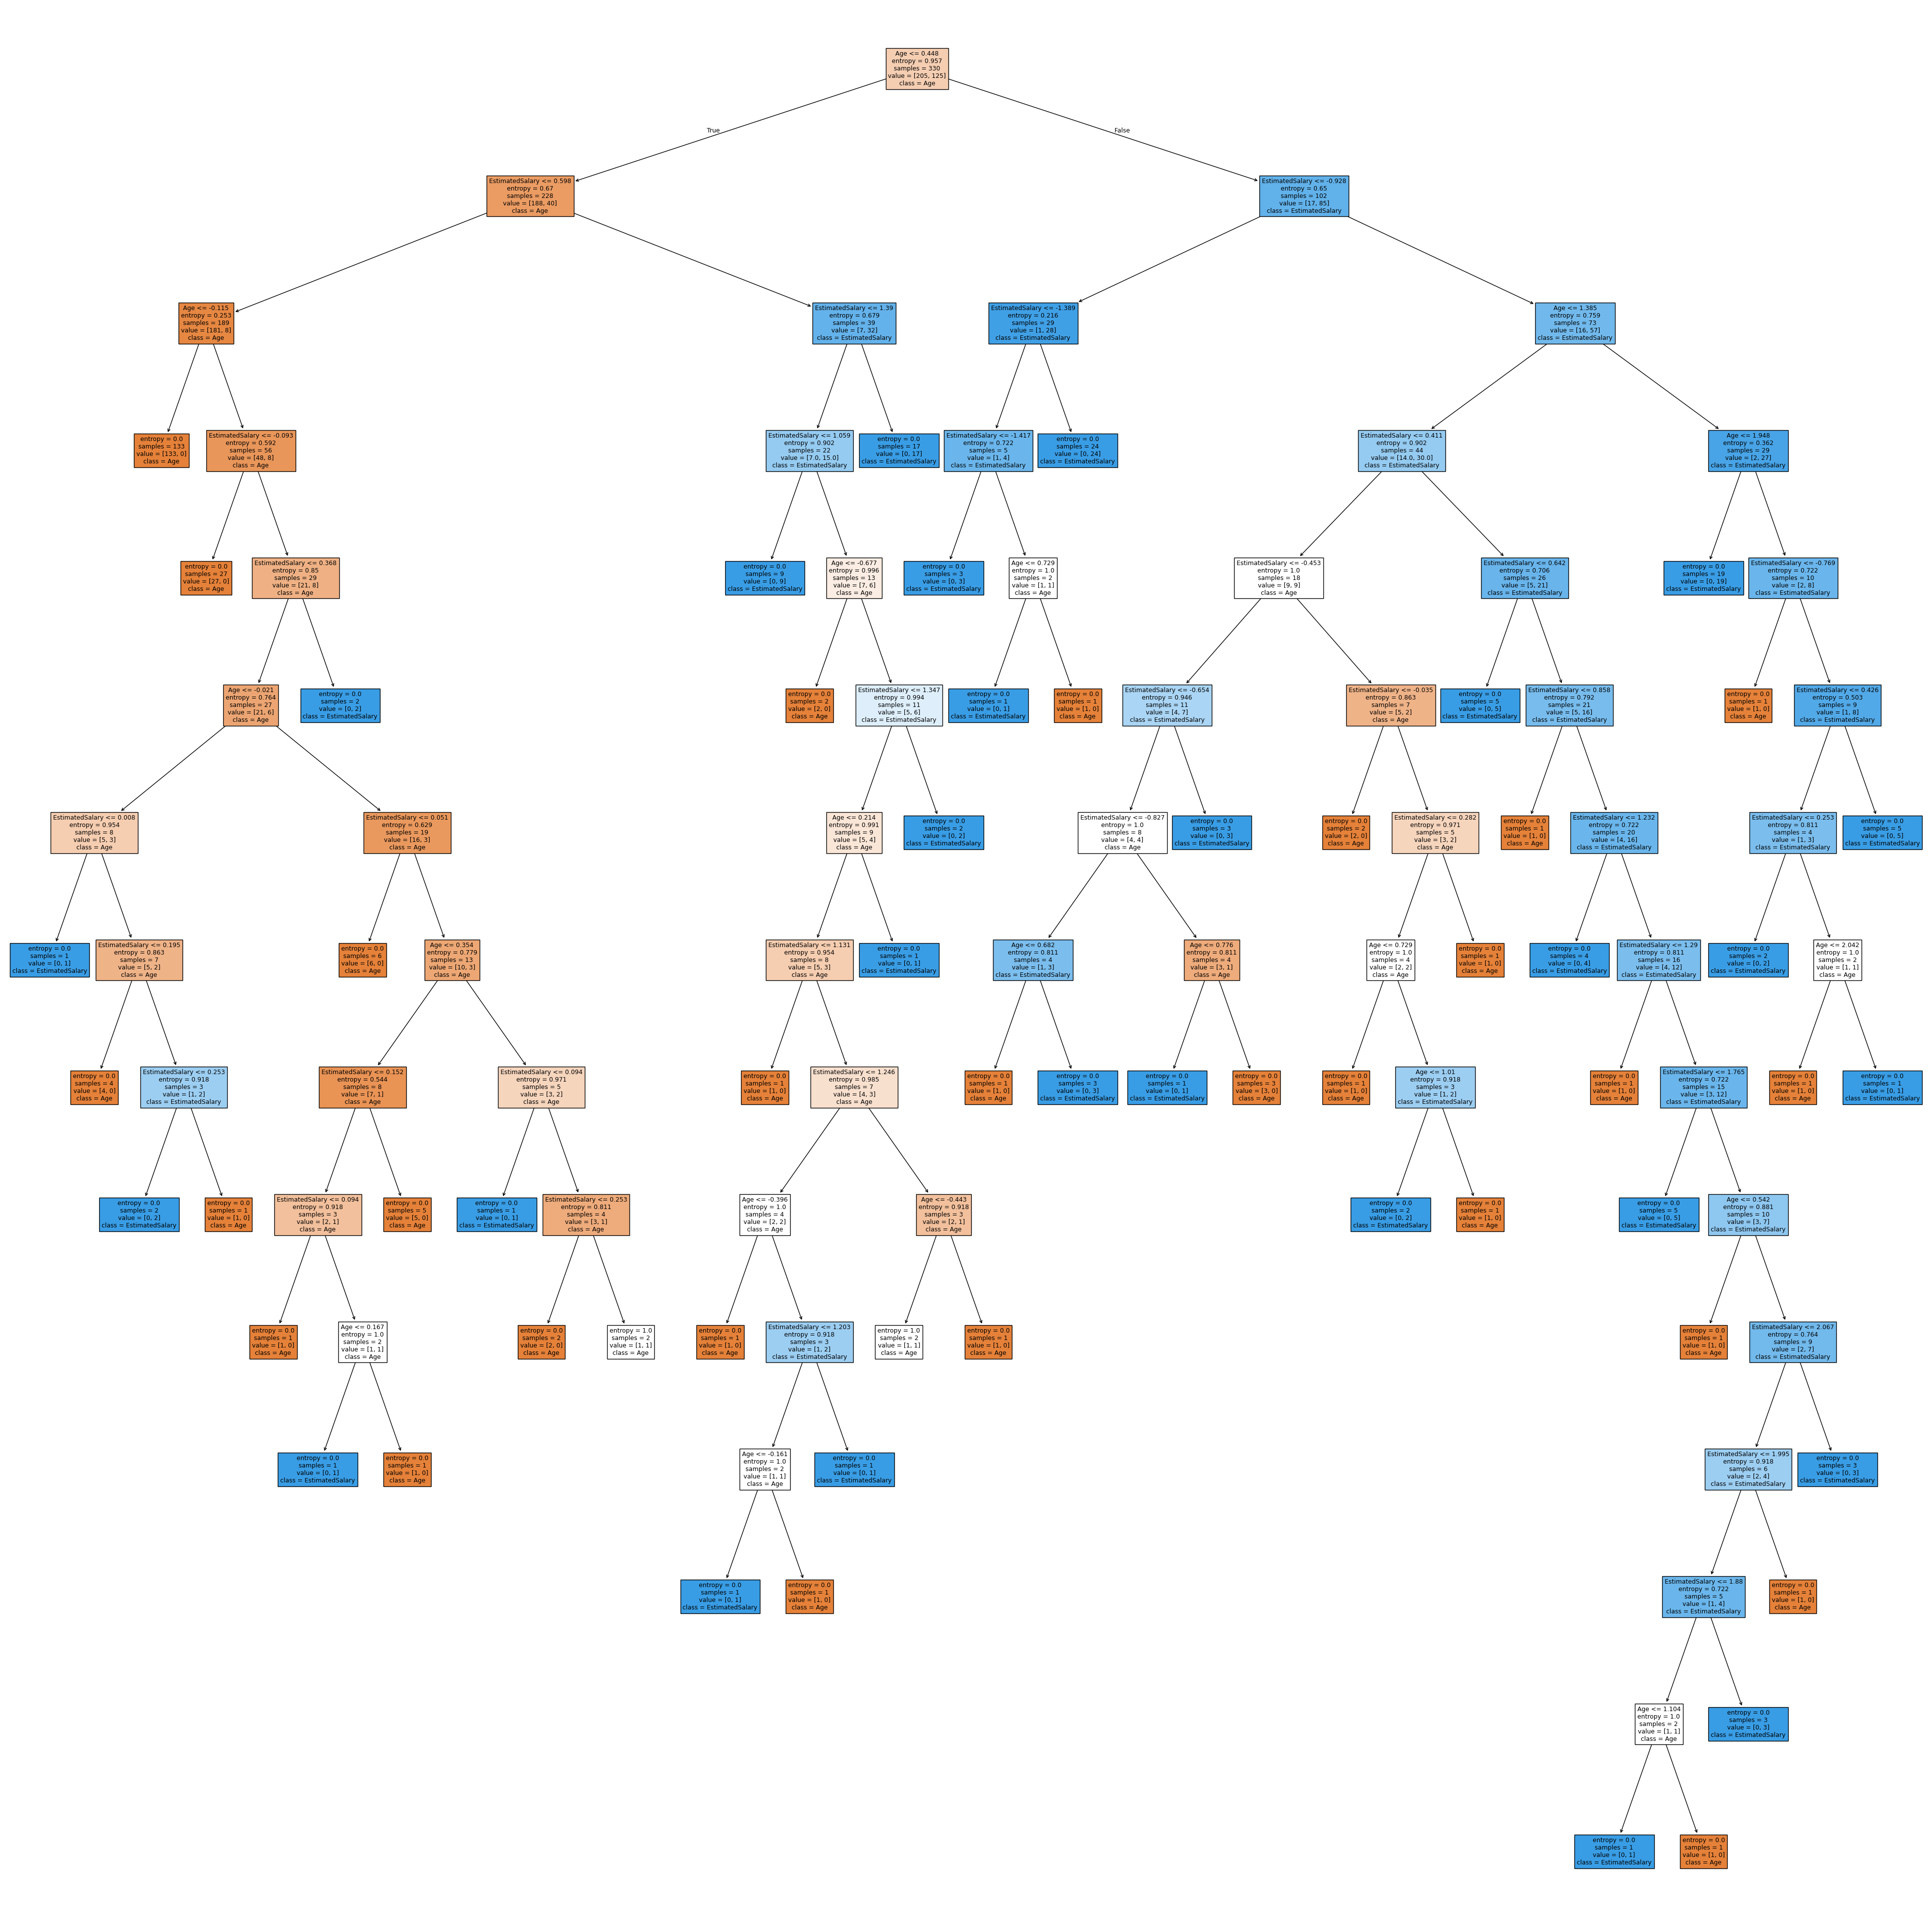

In [22]:
# Plot for decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
plot_tree(cls,filled=True,feature_names=['Age','EstimatedSalary'],class_names=['Age','EstimatedSalary'])
plt.show()

In [23]:
# Accuracy of prediction  (prompt to cGPT is training testing model fitting and decision tree algorithm)

from sklearn.metrics import accuracy_score

# Predict the labels for test set
y_pred=cls.predict(x_test)

# Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)

print(f' Accuracy:{accuracy*100:2f}%')

 Accuracy:81.081081%


In [26]:
# For user input

age=float(input("Enter age:"))
salary=float(input("Enter estimated salary:"))

myinput=pd.DataFrame(sc.transform([[age,salary]]),columns=['Age', 'EstimatedSalary'])
result=cls.predict(myinput)

if result[0]==1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")

Enter age: 1
Enter estimated salary: 10


Prediction: User will not purchase plan
